In [6]:
from lorenzetti_utils.read_events import *
from Gaugi import load
from Gaugi.monet.utils import getColor,getColors
from Gaugi.monet.PlotFunctions import *
from Gaugi.monet.TAxisFunctions import *
from Gaugi.monet.AtlasStyle import *
from Gaugi import stdvector_to_list, progressbar
from ROOT import TCanvas, TH1F, TH1I, TFile
from ROOT import TLatex, gPad
from ROOT import kRed, kBlue, kBlack,TLine,kBird, kOrange,kGray, kYellow, kViolet, kGreen, kAzure
from pprint import pprint
from pandas import DataFrame


import array
import numpy as np
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2
SetAtlasStyle()
GeV=1000.

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload

Applying ATLAS style settings...


In [2]:
basepath = '/Volumes/castor/cern_data/simulation/MonteCarlo_Simulation_Zee_and_JF17_plus_MinBias_Avgmu_60'

In [3]:
def read_events( path , nov=-1):
    
    event = EventStore(path, "physics")
    vars = ['et','eta','phi','reta','rphi','rhad','eratio','weta2','f1','f3']
    d = { key:[] for key in vars }
    d['rings'] = []
    
    if nov < 0 or nov > event.GetEntries():
        nov = event.GetEntries()
    
    for entry in progressbar( range(nov) , event.GetEntries() , prefix='Reading...') : 
        event.GetEntry(entry) 
        
        cluster_cont = event.retrieve("CaloClusterContainer_Clusters")
        for caloRings in event.retrieve("CaloRingsContainer_Rings"):
            
            emClus = cluster_cont.at(caloRings.cluster_link)
            for key in vars:
                d[key].append( getattr(emClus,key) )    
            d['rings'].append(stdvector_to_list(caloRings.rings))
            
    
    return DataFrame(d)

## Read Events:

In [4]:
path = basepath+'/Zee/AOD/Zee.AOD.root'
path = '~/Zee.AOD.root'
zee_mb = read_events(path)

Reading...|############################################################| 10000/10000
Reading...... finished task in 141.527749s.


In [5]:
path = basepath+'/JF17/AOD/JF17.AOD.root'
path = '~/JF17.AOD.root'
jets_mb = read_events(path)

Reading...|############################################################| 10000/10000
Reading...... finished task in 184.565988s.


## Plot Histograms:

In [25]:
def AddLegend(canvas, x, y, legends):
    MakeLegend( canvas,x,y,x+0.98,y+0.20,textsize=16, names=legends, option = 'f' )
    
def CreateHist(values, name, bins, xmin, xmax):
    h = TH1F(name, "", bins, xmin, xmax)
    w = array.array( 'd', np.ones_like(values) )
    h.FillN( len(values), array.array('d',  values.tolist()),  w)
    return h

def LZTLabel(canvas, x,y,text,color=1):
    l = TLatex()
    l.SetNDC()
    l.SetTextFont(72)
    l.SetTextColor(color)
    delx = 0.17*696*gPad.GetWh()/(472*gPad.GetWw())
    l.DrawLatex(x,y,"Lorenzetti")
    p = TLatex()
    p.SetNDC()
    p.SetTextFont(42)
    p.SetTextColor(color)
    p.DrawLatex(x+delx,y,text)
    canvas.Update()


def PlotHist( values_sgn, values_bkg , xlabel, bins, xmin, xmax , y_axis_maximum=None):
    from Gaugi.monet.utils import NormHist
    h_sgn = CreateHist(values_sgn, 'sgn', bins, xmin, xmax)
    h_bkg = CreateHist(values_bkg, 'bkg', bins, xmin, xmax)
    # Create canvas
    canvas = TCanvas('canvas','canvas',700, 500)
    h_sgn = NormHist(h_sgn)
    h_bkg = NormHist(h_bkg)
    h_sgn.SetLineColor(kAzure)
    h_sgn.SetFillColor(kAzure-4)
    h_bkg.SetLineColor(kRed)
    h_bkg.SetFillColor(getColor(kRed, 0.5))
    if y_axis_maximum:
        h_sgn.SetMaximum(y_axis_maximum)
        h_bkg.SetMaximum(y_axis_maximum)
    AddHistogram(canvas,h_sgn, 'same')
    AddHistogram(canvas,h_bkg, 'same')
    FormatCanvasAxes(canvas, XLabelSize=16, YLabelSize=16, XTitleOffset=0.87, ZLabelSize=16,
                             ZTitleSize=16, YTitleOffset=1.10, ZTitleOffset=1.1)
    SetAxisLabels(canvas,xlabel, 'counts/bin (norm by counts)')
    return canvas

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: pdf file LZT_eratio.pdf has been created


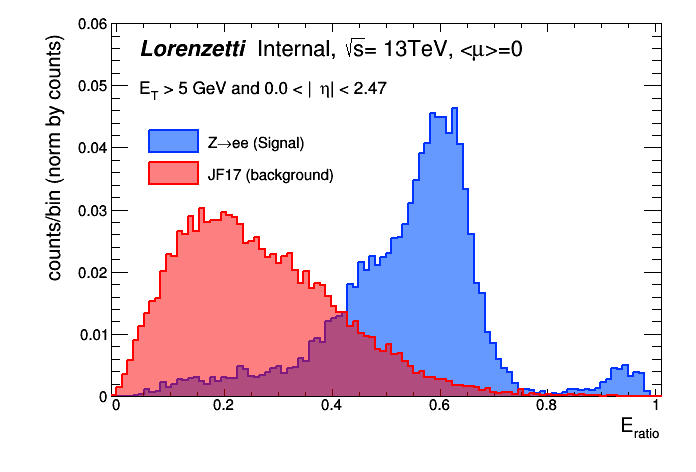

In [77]:
sgn = zee_mb.loc[ (zee_mb['et'] > 5*GeV) & (abs(zee_mb['eta']) <= 2.47) ]['eratio'].values
bkg = jets_mb.loc[ (jets_mb['et'] > 5*GeV) & (abs(jets_mb['eta']) <= 2.47) ]['eratio'].values

canvas = PlotHist( sgn, bkg, 'E_{ratio}', 100, 0.0, 1.0, y_axis_maximum=0.06)
LZTLabel(canvas, 0.2, 0.88, 'Internal, #sqrt{s}= 13TeV, <#mu>=0')
AddLegend( canvas,0.2,0.6, ['Z#rightarrowee (Signal)', 'JF17 (background)'])
AddTexLabel(canvas, 0.2, 0.8, 'E_{T} > 5 GeV and 0.0 < |#eta| < 2.47', textsize=0.04)
canvas.Draw()
canvas.SaveAs('LZT_eratio.pdf')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: pdf file LZT_reta.pdf has been created


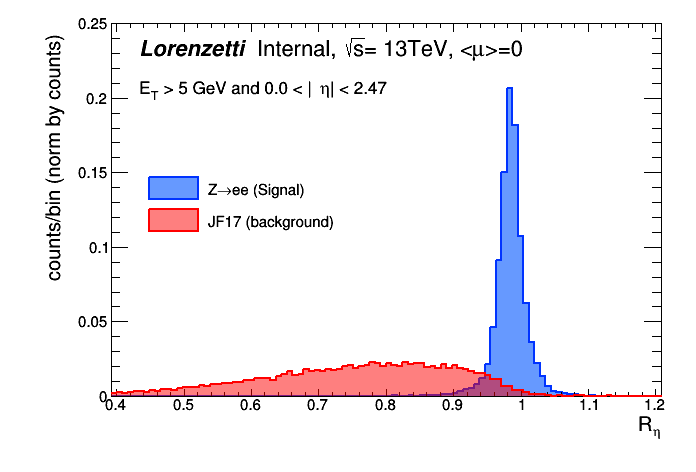

In [75]:
sgn = zee_mb.loc[ (zee_mb['et'] > 5*GeV) & (abs(zee_mb['eta']) <= 2.47) ]['reta'].values
bkg = jets_mb.loc[ (jets_mb['et'] > 5*GeV) & (abs(jets_mb['eta']) <= 2.47) ]['reta'].values

canvas = PlotHist(sgn, bkg, 'R_{#eta}', 100, 0.4, 1.2, y_axis_maximum=0.25)
LZTLabel(canvas, 0.2, 0.88, 'Internal, #sqrt{s}= 13TeV, <#mu>=0')
AddLegend( canvas,0.2,0.5, ['Z#rightarrowee (Signal)', 'JF17 (background)'])
AddTexLabel(canvas, 0.2, 0.8, 'E_{T} > 5 GeV and 0.0 < |#eta| < 2.47', textsize=0.04)
canvas.Draw()
canvas.SaveAs('LZT_reta.pdf')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: pdf file LZT_rphi.pdf has been created


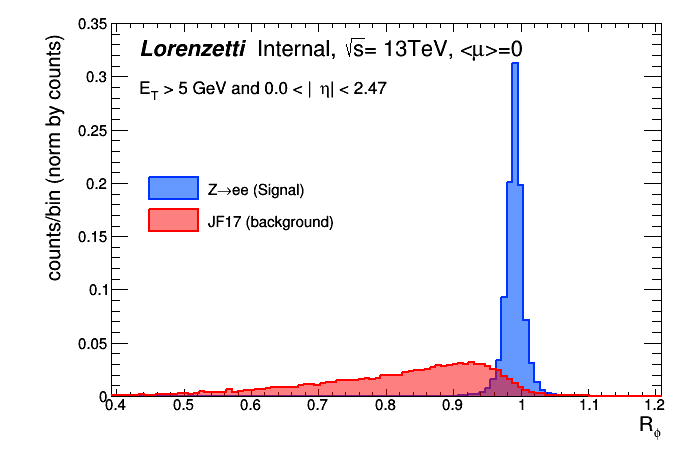

In [39]:
sgn = zee_mb.loc[ (zee_mb['et'] > 5*GeV) & (abs(zee_mb['eta']) <= 2.47) ]['rphi'].values
bkg = jets_mb.loc[ (jets_mb['et'] > 5*GeV) & (abs(jets_mb['eta']) <= 2.47) ]['rphi'].values

canvas = PlotHist(sgn, bkg, 'R_{#phi}', 100, 0.4, 1.2, y_axis_maximum=0.35)
LZTLabel(canvas, 0.2, 0.88, 'Internal, #sqrt{s}= 13TeV, <#mu>=0')
AddLegend( canvas,0.2,0.5, ['Z#rightarrowee (Signal)', 'JF17 (background)'])
AddTexLabel(canvas, 0.2, 0.8, 'E_{T} > 5 GeV and 0.0 < |#eta| < 2.47', textsize=0.04)
canvas.Draw()
canvas.SaveAs('LZT_rphi.pdf')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: pdf file LZT_weta2.pdf has been created


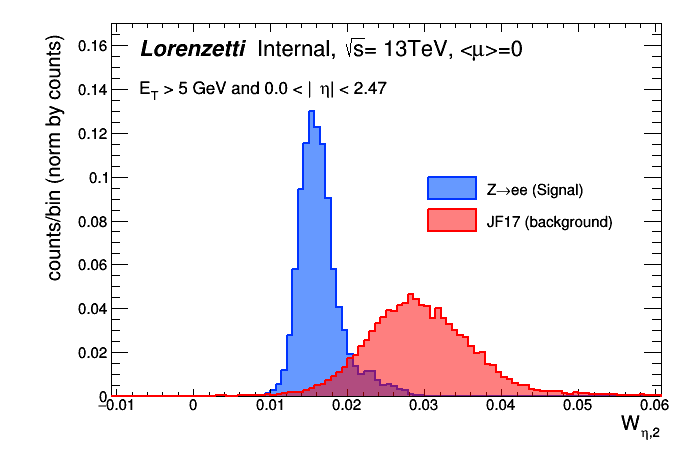

In [52]:
sgn = zee_mb.loc[ (zee_mb['et'] > 5*GeV) & (abs(zee_mb['eta']) <= 2.47) ]['weta2'].values
bkg = jets_mb.loc[ (jets_mb['et'] > 5*GeV) & (abs(jets_mb['eta']) <= 2.47) ]['weta2'].values

canvas = PlotHist(sgn, bkg, 'W_{#eta,2}', 100, -0.01, 0.06, y_axis_maximum=0.17)
LZTLabel(canvas, 0.2, 0.88, 'Internal, #sqrt{s}= 13TeV, <#mu>=0')
AddLegend( canvas,0.6,0.5, ['Z#rightarrowee (Signal)', 'JF17 (background)'])
AddTexLabel(canvas, 0.2, 0.8, 'E_{T} > 5 GeV and 0.0 < |#eta| < 2.47', textsize=0.04)
canvas.Draw()
canvas.SaveAs('LZT_weta2.pdf')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: pdf file LZT_rhad.pdf has been created


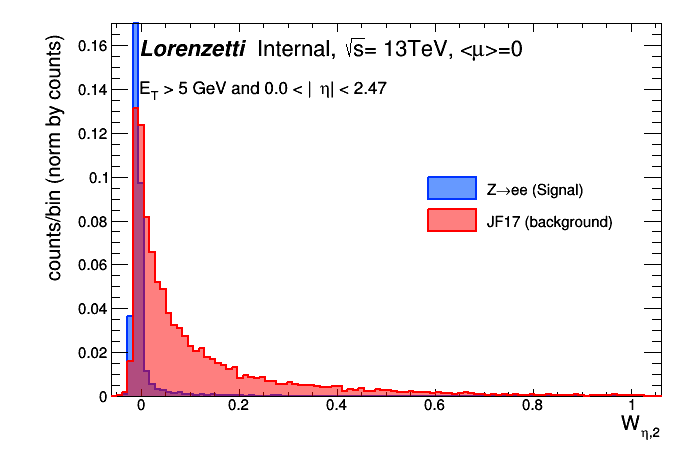

In [73]:
etamin = 0.0
etamax = 1.5

sgn = zee_mb.loc[ (zee_mb['et'] > 5*GeV) & (abs(zee_mb['eta']) <= etamax) 
                     & (abs(zee_mb['eta']) > etamin) ]['rhad'].values
bkg = jets_mb.loc[ (jets_mb['et'] > 5*GeV) & (abs(jets_mb['eta']) <= etamax) 
                     & (abs(zee_mb['eta']) > etamin)]['rhad'].values

canvas = PlotHist(sgn, bkg, 'W_{#eta,2}', 100, -0.05, 1.05, y_axis_maximum=0.17)
LZTLabel(canvas, 0.2, 0.88, 'Internal, #sqrt{s}= 13TeV, <#mu>=0')
AddLegend( canvas,0.6,0.5, ['Z#rightarrowee (Signal)', 'JF17 (background)'])
AddTexLabel(canvas, 0.2, 0.8, 'E_{T} > 5 GeV and 0.0 < |#eta| < 2.47', textsize=0.04)
canvas.Draw()
canvas.SaveAs('LZT_rhad.pdf')